# TP1 Análisis exploratorio de datos Trocafone

In [5]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

### Cargamos los datos y vemos las primeras lineas

In [3]:
events = pd.read_csv('./data/events.csv.gz',compression='gzip',low_memory=False)
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analizamos rapidamente la forma de los datos que recibimos
Vemos cuantas columnas tenemos, si hay datos nulos, cuantos elementos hay en cada columna

In [6]:
# Analizamos las dimensiones del dataframe
events.shape

(1011288, 23)

In [7]:
# Vemos que tipos tenemos en el df
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [8]:
# chequeamos que columnas tienen datos nulos y cuantos son
events.isnull().sum()

timestamp                         0
event                             0
person                            0
url                          928532
sku                          447450
model                        447004
condition                    447452
storage                      447452
color                        447452
skus                         789589
search_term                  962321
staticpage                  1007690
campaign_source              928492
search_engine                960331
channel                      923910
new_vs_returning             923910
city                         923910
region                       923910
country                      923910
device_type                  923910
screen_resolution            923910
operating_system_version     923910
browser_version              923910
dtype: int64

In [9]:
events.describe(include='all')

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


### ¿ Que paises tenemos en el set de datos?

In [10]:
events['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
Netherlands              13
France                   13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Portugal                  7
Romania                   7
Italy                     7
Russia                    6
Dominican Republic        6
Guadeloupe                6
Germany                   5
Bangladesh                4
Paraguay                  4
Colombia                  4
Switzerland               3
India                     2
Angola                    2
Morocco                   2
Philippines               1
Zimbabwe                  1
Rwanda                    1
Cape Verde                1
Uruguay                   1
South Africa              1
Uzbekistan                1
China                     1
Peru                      1
Denmark             

### ¿Podemos quedarnos solo con Brasil ya que es el que aparece muchisimas mas veces que los otros?
Si bien de los paises que tenemos, el que predomina es Brasil, tenemos 923910 datos que no tienen ningun pais asignado, por lo que no podemos descartarlos porque son una gran mayoria.


### ¿De cuando son los datos?

In [11]:
# Creamos una nueva columna con la fecha como datetime para poder manipular mejor los datos
events['datetime'] = pd.to_datetime(events['timestamp'])
events['datetime'].head()

0   2018-05-31 23:38:05
1   2018-05-31 23:38:05
2   2018-05-31 23:38:09
3   2018-05-31 23:38:40
4   2018-05-29 13:29:25
Name: datetime, dtype: datetime64[ns]

In [12]:
events['datetime'].dt.year.value_counts()

2018    1011288
Name: datetime, dtype: int64

In [13]:
events['datetime'].dt.month.value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: datetime, dtype: int64


Podemos ver que todos los datos que tenemos son entre enero y mayo de 2018

### ¿Que tipo de eventos tenemos?

In [14]:
events['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

### ¿Cuantas veces ocurrió cada evento?

Text(0.5,1,'Cantidad de ocurrencias de cada evento')

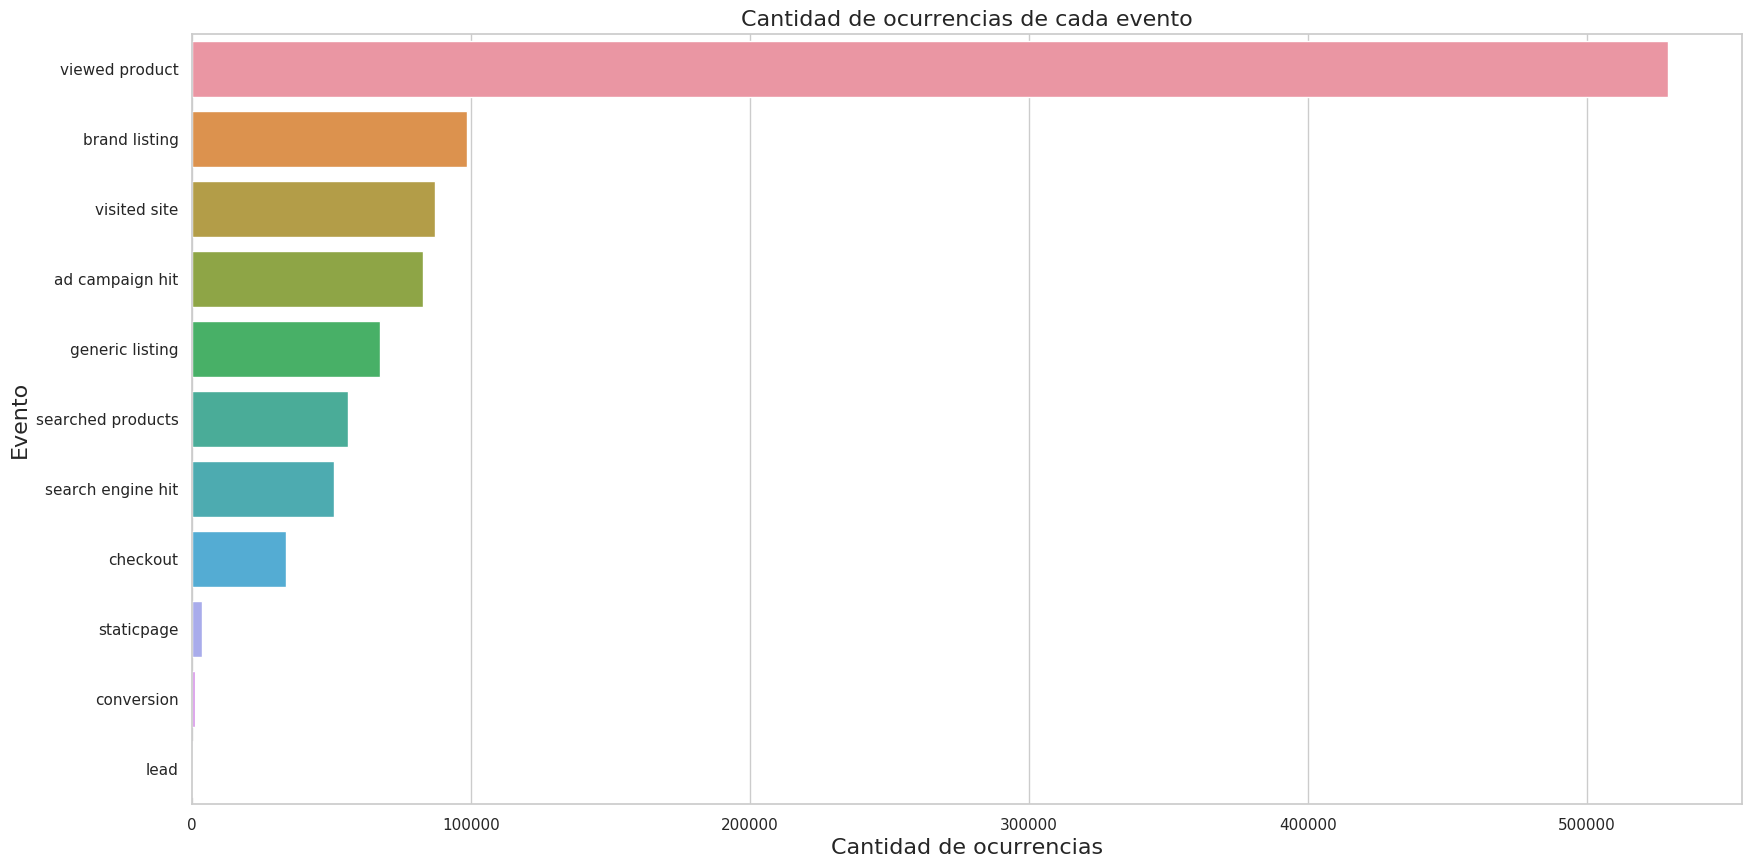

In [15]:
events_counts = events['event'].value_counts()
g = sns.barplot(x=events_counts.values, y=events_counts.index, orient='h')
g.set_xlabel("Cantidad de ocurrencias", fontsize=16)
g.set_ylabel("Evento", fontsize=16)
g.set_title("Cantidad de ocurrencias de cada evento", fontsize=16)

### ¿Cuales son 10 los usuarios con mas eventos y que realizaron?

In [16]:
events_by_users = events.groupby(['person', 'event'])['event'].agg('count').unstack()
events_by_users['number_of_events'] = events.groupby('person')['event'].count()
top_10_users = events_by_users.sort_values(ascending=False, by='number_of_events').head(10)
top_10_users.drop(['number_of_events'], inplace=True, axis=1)

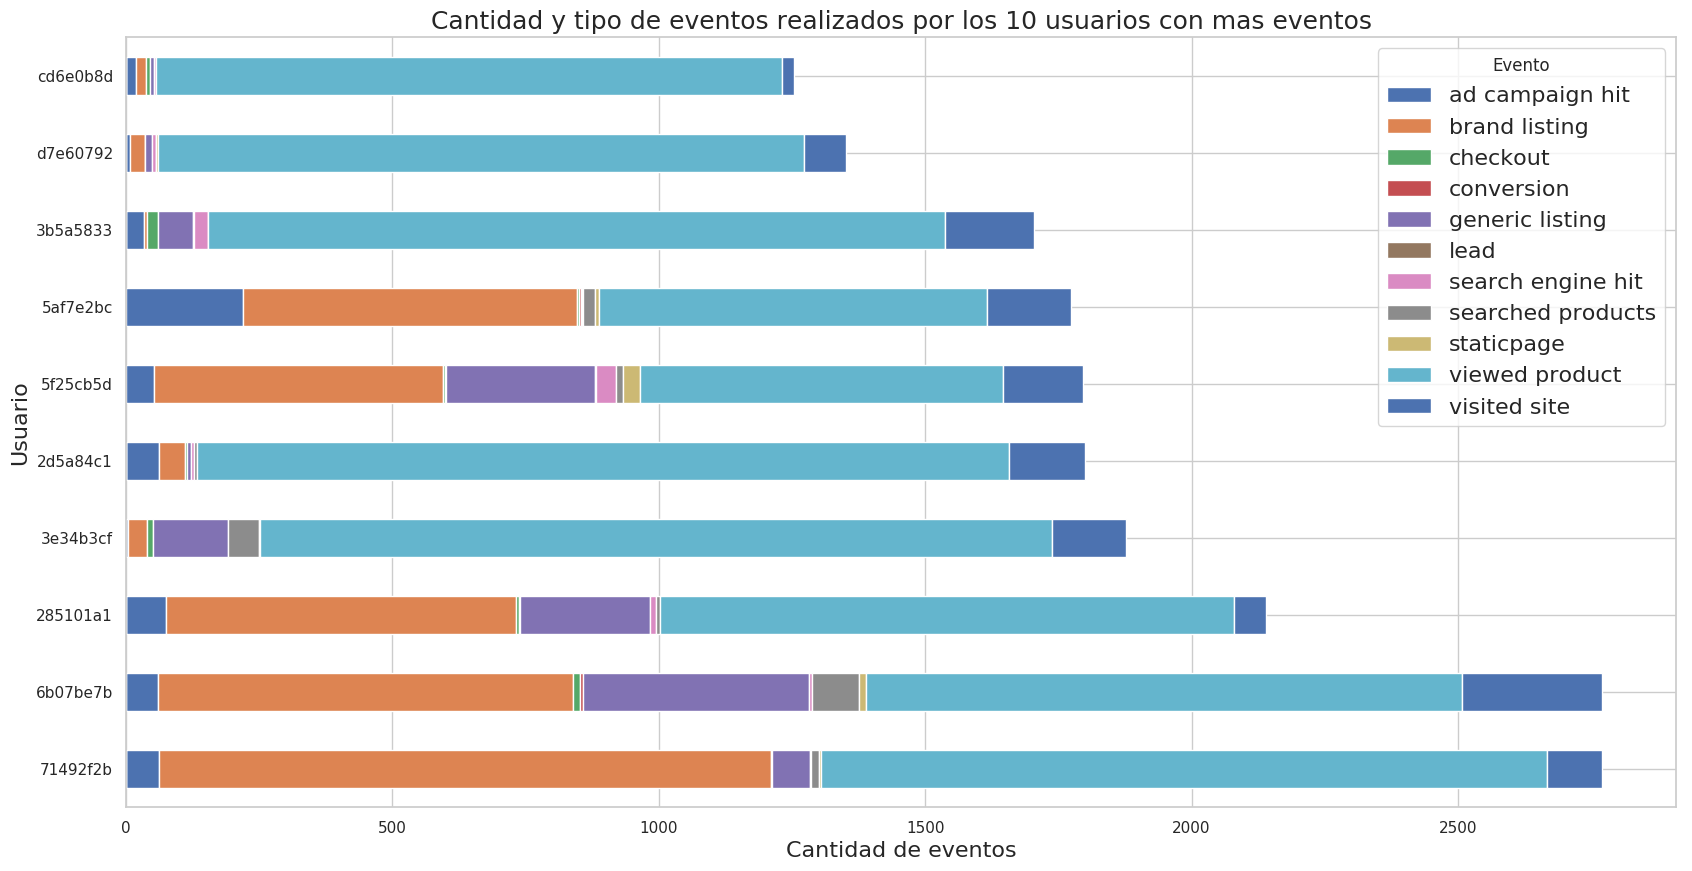

In [17]:
g = top_10_users.plot(kind='barh', stacked=True)
g.set_title('Cantidad y tipo de eventos realizados por los 10 usuarios con mas eventos', fontsize=18)
g.set_xlabel('Cantidad de eventos', fontsize=16)
g.set_ylabel('Usuario',fontsize=16)
g.legend(title='Evento', fontsize=16)

### ¿El número de conversiones del usuario esta relacionado a la cantidad de campaign hits que tuvo?

Text(0.5,1,"Relación entre 'campaign hits' del usuario y conversiones")

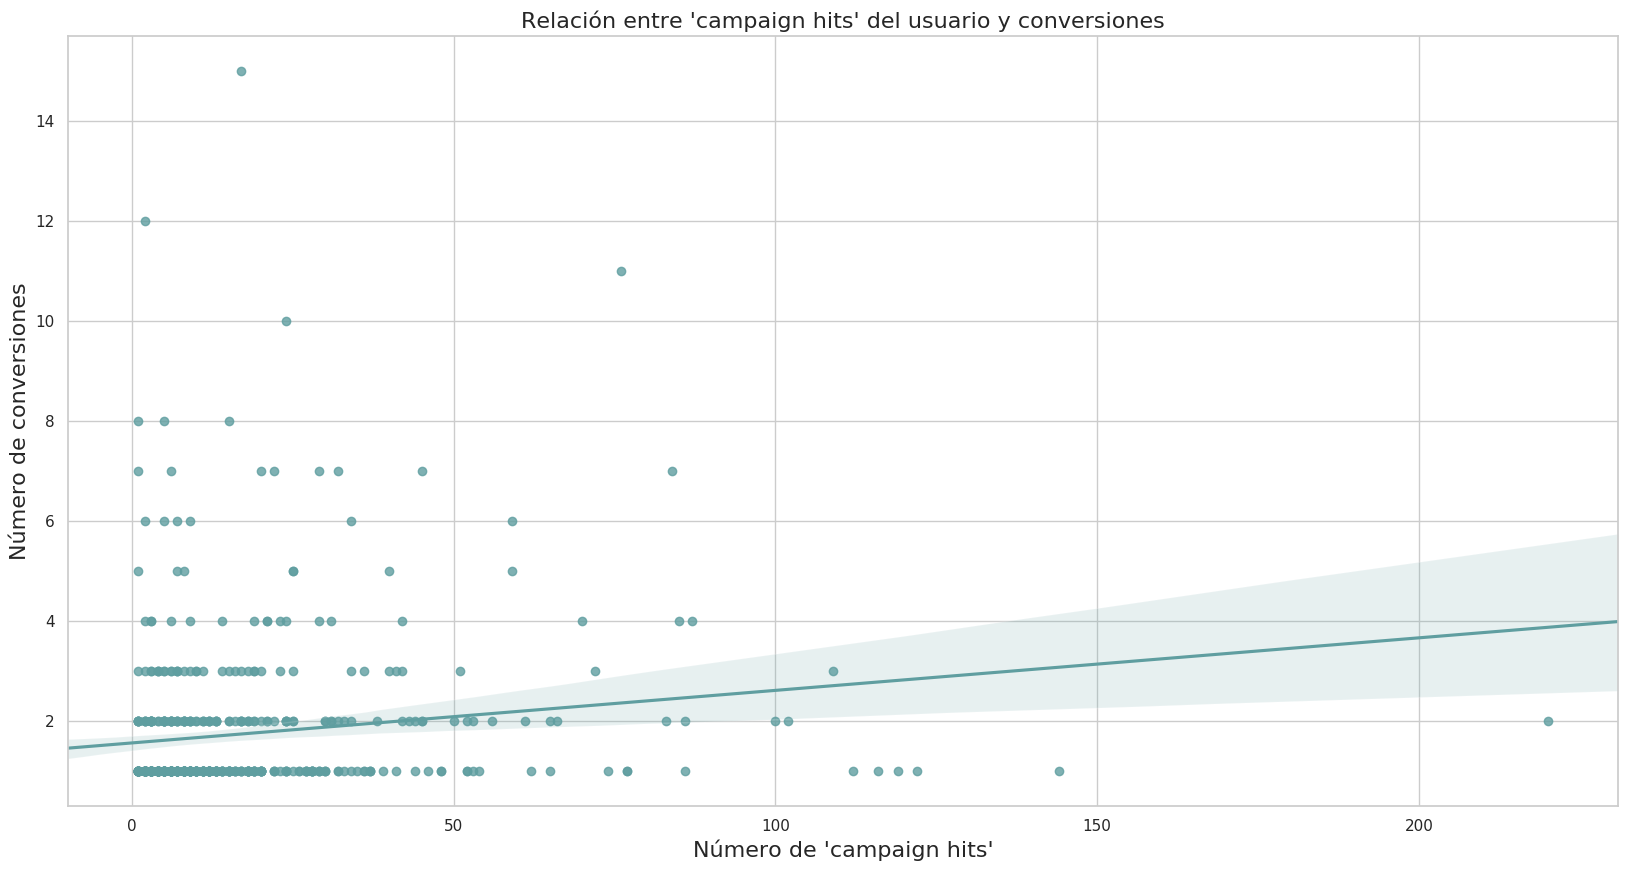

In [18]:
g = sns.regplot(x='ad campaign hit', y='conversion', data=events_by_users, color="cadetblue")
g.set_xlabel("Número de 'campaign hits'", fontsize=16)
g.set_ylabel("Número de conversiones", fontsize=16)
g.set_title("Relación entre 'campaign hits' del usuario y conversiones", fontsize=16)


Podemos ver que hay una relacion entre el numero de campaign hits con el numero de conversiones, pero es muy debil.

### ¿Hay una relacion entre la cantidad de eventos del usuario en el sitio y la cantidad de conversiones?

Text(0.5,1,'Relación entre numero de eventos del usuario y conversiones')

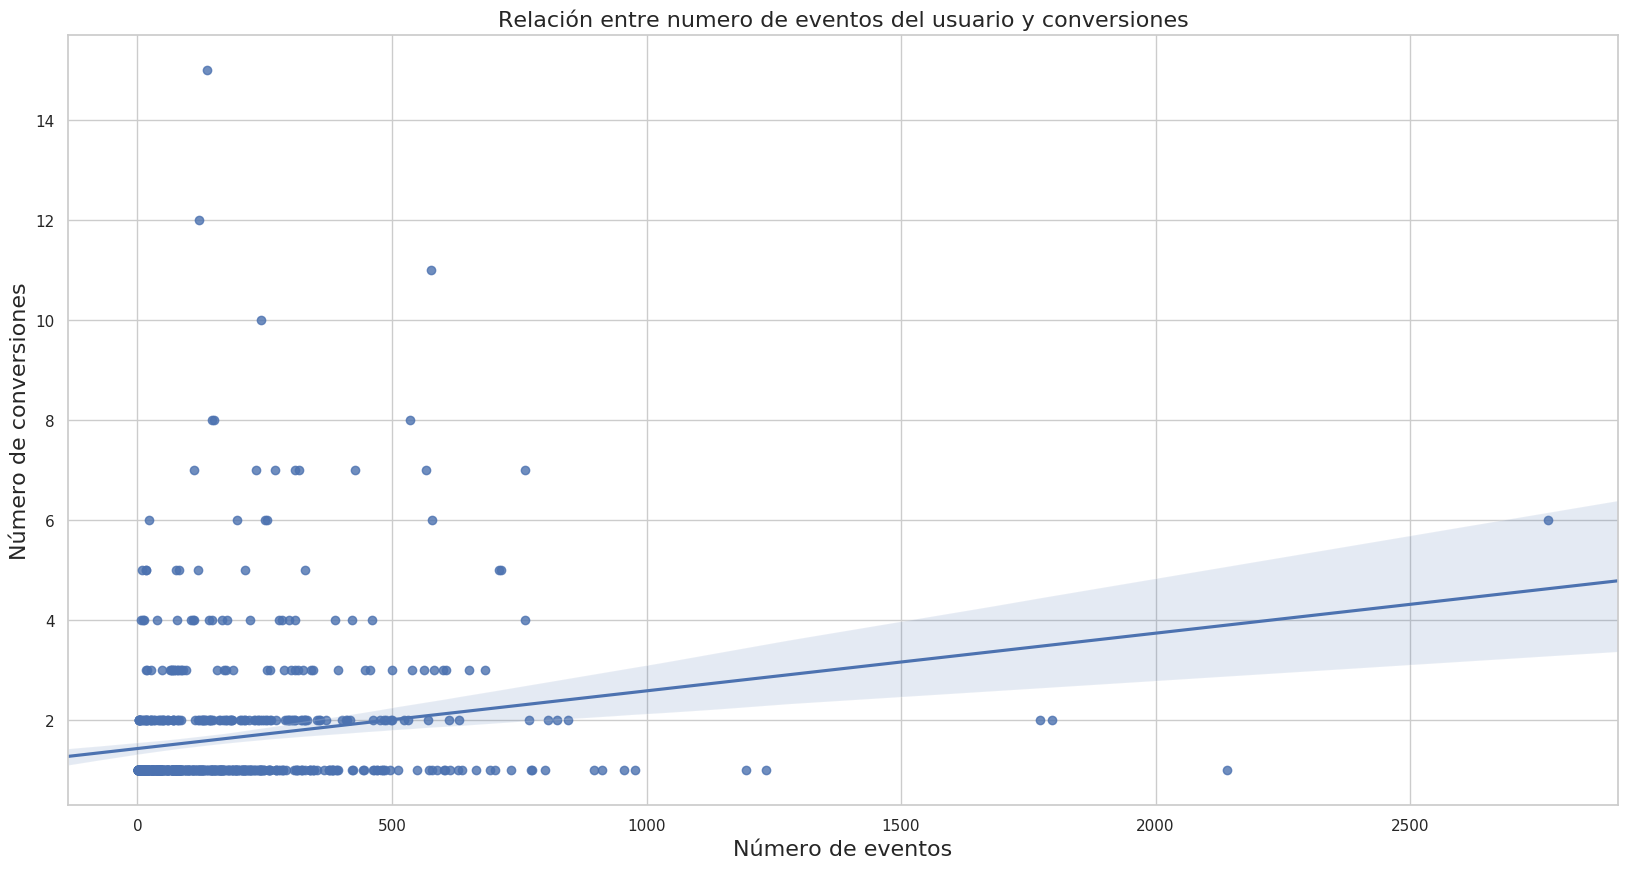

In [109]:
g = sns.regplot(x='number_of_events', y='conversion', data=events_by_users, color="b")
g.set_xlabel("Número de eventos", fontsize=16)
g.set_ylabel("Número de conversiones", fontsize=16)
g.set_title("Relación entre numero de eventos del usuario y conversiones", fontsize=16)

Vemos que la relacion entre número de eventos y número de conversiones es despreciable.

### ¿Que hicieron los usuarios con los 10 productos que mas conversiones tienen?

In [104]:
events_by_sku = events.groupby(['sku','event'])['event'].agg('count').unstack()
events_by_sku.reset_index(inplace=True)
top_sku_by_conversion = events_by_sku.sort_values(ascending=False,by='conversion').head(10)


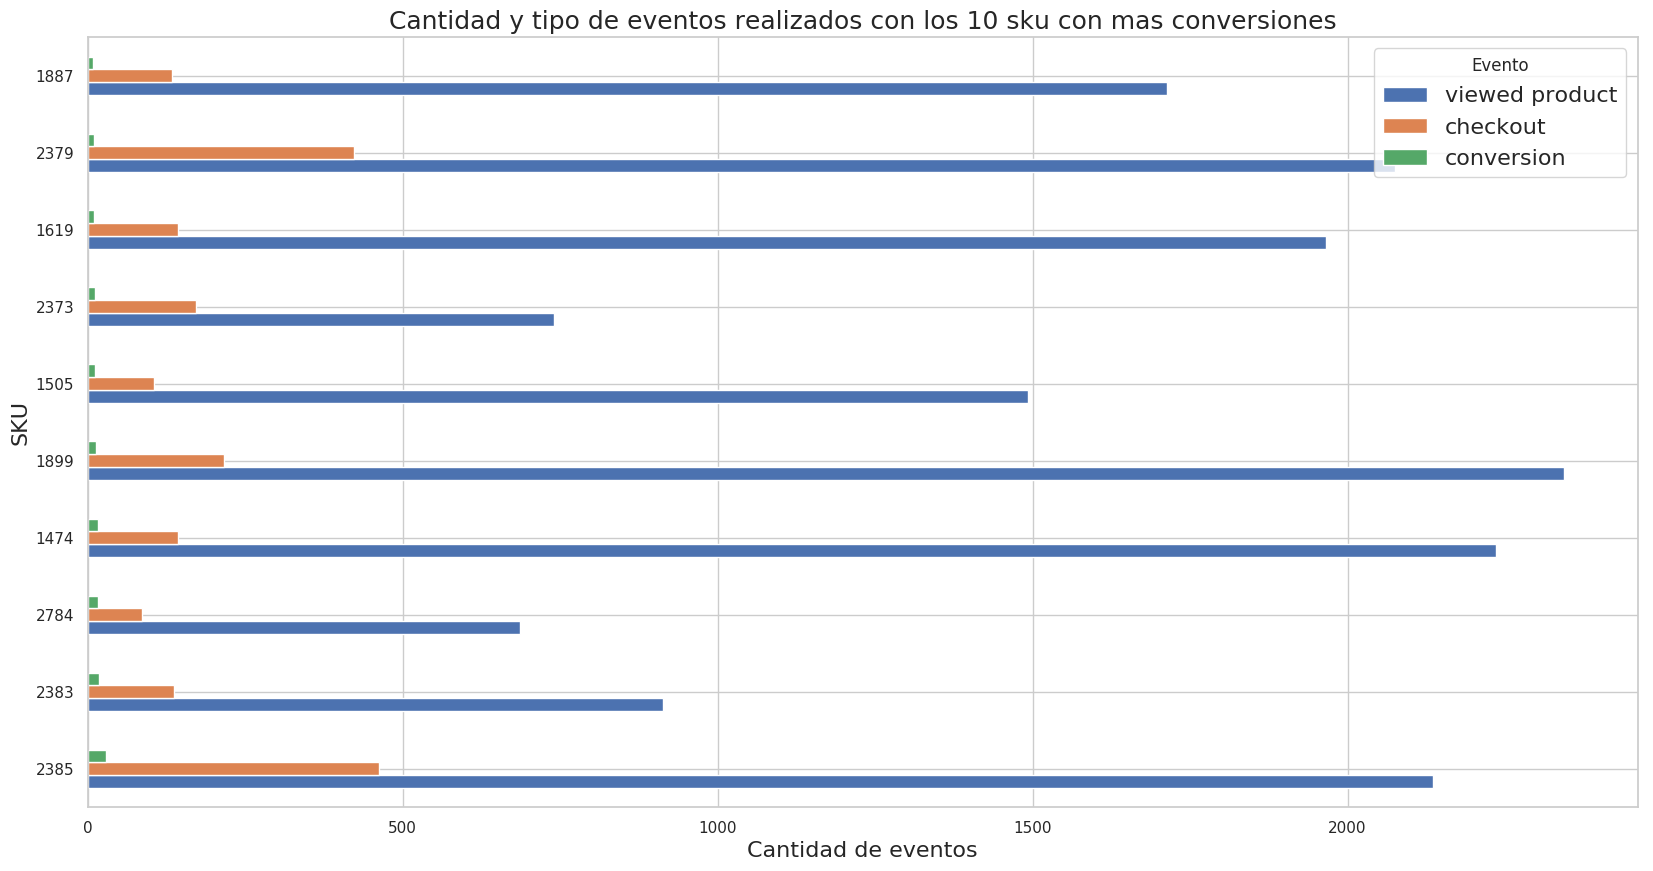

In [105]:
g = top_sku_by_conversion.plot(kind='barh')
g.set_title('Cantidad y tipo de eventos realizados con los 10 sku con mas conversiones', fontsize=18)
g.set_xlabel('Cantidad de eventos', fontsize=16)
g.set_ylabel('SKU',fontsize=16)
g.legend(title='Evento', fontsize=16)

### ¿Los usuarios realizan diferentes eventos segun el dia de la semana?

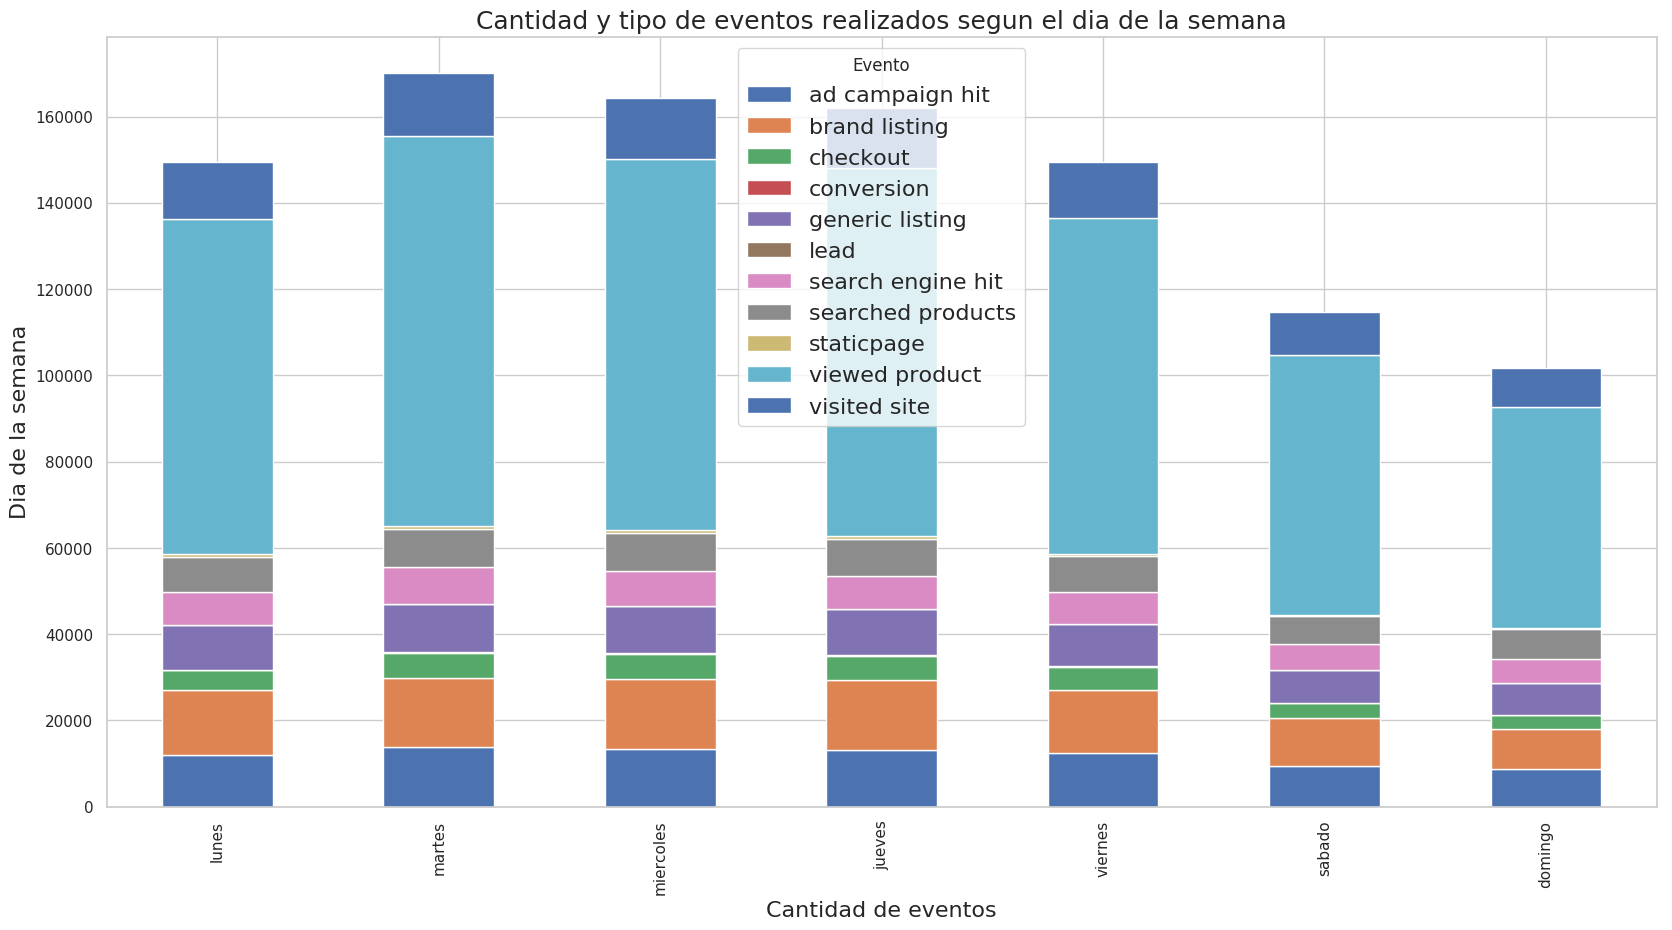

In [114]:
events['dayofweek'] = events['datetime'].dt.dayofweek
events_by_day = events.groupby(['dayofweek','event'])['event'].count().unstack()
events_by_day.index=['lunes','martes','miercoles','jueves','viernes','sabado','domingo']
g = events_by_day.plot(kind='bar', stacked=True)
g.set_title('Cantidad y tipo de eventos realizados segun el dia de la semana', fontsize=18)
g.set_xlabel('Cantidad de eventos', fontsize=16)
g.set_ylabel('Dia de la semana',fontsize=16)
g.legend(title='Evento', fontsize=16)


Podemos ver que si bien los domingos hay mucho menos usuarios activos, se mantiene la proporcion entre los diferentes tipos de eventos. Por lo tanto podemos decir que no se comportan diferente segun el dia de la semana.

El dia con mayor trafico en el sitio es el martes.

### ¿Cuantas sesiones tuvieron los usuarios?

Una sesion es un periodo de tiempo en el que el usuario interactua con el sitio sin tener mas de 30 minutos de inactividad. Luego de los 30 minutos sin realizar ningun evento, consideramos que es una nueva sesion.

In [63]:

events_by_users = events.groupby(['person', 'event'])['event'].agg('count').unstack()
events_by_users['number_of_events'] = events.groupby('person')['event'].count()

## Agrega columna con numero de sesion del usuario y con el evento anterior
def completar_con_evento_previo_y_sesion(data):
    numeros_de_sesion = []
    eventos_previos = []
    duracion_de_las_sesiones = []
    num_sesion = 1
    inicio_de_la_sesion=data['datetime'].values[0]
    for i in range(0,len(data['datetime'])):
        numeros_de_sesion.append(num_sesion)
        
        if(i< len(data['datetime'])-1 and (data['datetime'].values[i+1] - data['datetime'].values[i]) > np.timedelta64(30, 'm')):
            num_sesion +=1
            evento_previo = np.nan
            duracion_de_la_sesion = data['datetime'].values[i] - inicio_de_la_sesion
            inicio_de_la_sesion = data['datetime'].values[i+1]
        else:
            duracion_de_la_sesion = np.nan #No guardamos duracion de la sesion hasta que no este terminada
        evento_previo = data['event'].values[i-1] if i> 0 else np.nan
        
        eventos_previos.append(evento_previo)
        duracion_de_las_sesiones.append(duracion_de_la_sesion)
        
    data['evento_previo'] = eventos_previos  
    data['numero_de_sesion'] = numeros_de_sesion
    data['duracion_de_la_sesion'] = duracion_de_las_sesiones
    return data
events_por_persona_con_evento_previo = events.sort_values(by='datetime',ascending=True).groupby(['person']).apply(completar_con_evento_previo_y_sesion)

In [22]:
events_por_persona_con_evento_previo['numero_de_sesion'].mean()

8.247111604211659

In [23]:
events_por_persona_con_evento_previo['numero_de_sesion'].max()

262

Los usuarios en promedio tuvieron 8.24 sesiones. El usuario con mas sesiones tuvo 262

### ¿Cuantas sesiones tuvieron los usuarios que compraron?

In [72]:
usuarios_con_conversiones = events[events['event'] == 'conversion']['person'].drop_duplicates()
events_de_usuarios_con_conversiones_con_sesion = events_por_persona_con_evento_previo[events_por_persona_con_evento_previo['person'].isin(usuarios_con_conversiones)]
events_de_usuarios_con_conversiones_con_sesion['numero_de_sesion'].mean()

21.521939122748

In [73]:
events_de_usuarios_con_conversiones_con_sesion['numero_de_sesion'].max()

262

Los usuarios con conversiones tuvieron en promedio 21 sesiones

### ¿Cuanto dura cada sesion?

In [74]:
duracion_de_sesiones = events_por_persona_con_evento_previo['duracion_de_la_sesion'].dropna()
duracion_de_sesiones.max()

Timedelta('0 days 04:28:51')

In [66]:
duracion_de_sesiones.mean()

Timedelta('0 days 00:07:17.941114')

Duracion maxima: 4 horas, 30 minutos.

Duracion promedio: 7 minutos

#### ¿Y cuanto las de usuarios que tienen conversiones?

In [70]:
duracion_de_sesiones_de_usuarios_con_conversiones = events_de_usuarios_con_conversiones_con_sesion['duracion_de_la_sesion'].dropna()
duracion_de_sesiones_de_usuarios_con_conversiones.max()

Timedelta('0 days 04:25:28')

In [69]:
duracion_de_sesiones_de_usuarios_con_conversiones.mean()

Timedelta('0 days 00:08:17.863569')

La duracion promedio de la sesion de un usuario con conversiones es  de 8 minutos

### ¿Cual es el flujo de los usuarios en el sitio?
Nos interesa ver el orden en el que generalmente realizan los eventos por cada sesion.


In [187]:
path_de_usuario = events_por_persona_con_evento_previo[['person','evento_previo','event']].dropna()
path_de_usuario.columns=['person','desde','hasta']
path_agrupado = path_de_usuario.groupby(['desde','hasta'])['hasta'].agg('count').unstack().fillna(0)
path_agrupado

hasta,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
desde,,,,,,,,,,,
ad campaign hit,"2,531.00","6,190.00","1,126.00",19.00,"12,504.00",1.00,"11,782.00","1,097.00",87.00,"28,630.00","15,733.00"
brand listing,"3,936.00","36,683.00",113.00,9.00,"2,007.00",1.00,"2,242.00","1,980.00",147.00,"44,065.00","1,674.00"
checkout,"6,042.00",540.00,"1,190.00",784.00,"3,072.00",111.00,"4,770.00",91.00,53.00,"3,720.00","11,716.00"
conversion,50.00,12.00,219.00,73.00,245.00,0.00,21.00,12.00,6.00,57.00,65.00
generic listing,"6,808.00","7,714.00",196.00,56.00,"3,968.00",1.00,"6,587.00","6,060.00",633.00,"22,920.00","7,250.00"
lead,2.00,1.00,0.00,0.00,3.00,27.00,2.00,0.00,1.00,3.00,9.00
search engine hit,"13,290.00","3,991.00",334.00,0.00,"12,531.00",1.00,744.00,967.00,201.00,"8,329.00","9,364.00"
searched products,873.00,"1,215.00",46.00,5.00,951.00,0.00,659.00,"22,274.00",77.00,"25,993.00",500.00
staticpage,189.00,209.00,26.00,6.00,347.00,0.00,192.00,133.00,823.00,775.00,168.00


Text(0.5,1,'Transiciones entre eventos de usuarios')

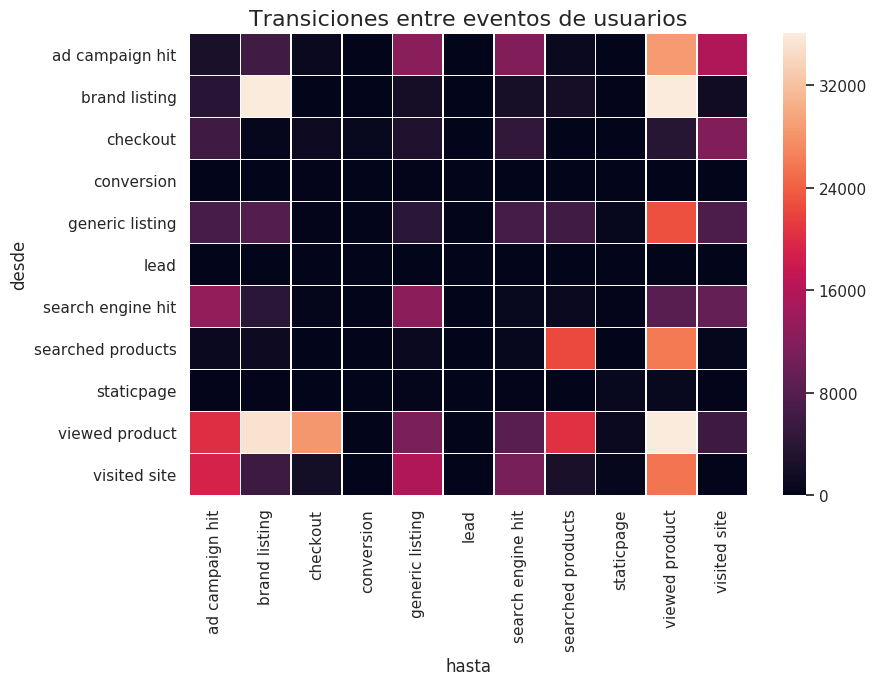

In [166]:
f, ax = plt.subplots(figsize=(9, 6))
g = sns.heatmap(path_agrupado, annot=False, linewidths=.5, ax=ax,robust=True)
g.set_title("Transiciones entre eventos de usuarios", fontsize=16)


Podemos ver que el lugar por donde mas se termina entrando a ver un producto es desde el listado de marcas, seguido por un hit de una publicidad.

### ¿Los usuarios con conversiones siguen el mismo flujo que el resto?

In [134]:
usuarios_con_conversiones = events[events['event'] == 'conversion']['person'].drop_duplicates()
path_de_usuario_con_conversiones = path_de_usuario[path_de_usuario['person'].isin(usuarios_con_conversiones)]
path_agrupado_de_usuarios_con_conversiones = path_de_usuario_con_conversiones.groupby(['desde','hasta'])['hasta'].agg('count').unstack().fillna(0)
path_agrupado_de_usuarios_con_conversiones

hasta,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
desde,,,,,,,,,,,
ad campaign hit,284.00,703.00,55.00,19.00,"1,496.00",0.00,"1,095.00",119.00,31.00,"3,100.00","1,595.00"
brand listing,438.00,"6,186.00",18.00,9.00,420.00,1.00,230.00,378.00,45.00,"6,701.00",285.00
checkout,241.00,42.00,263.00,784.00,278.00,10.00,154.00,26.00,17.00,655.00,240.00
conversion,50.00,12.00,219.00,73.00,245.00,0.00,21.00,12.00,6.00,57.00,65.00
generic listing,958.00,"1,438.00",55.00,56.00,832.00,0.00,840.00,814.00,263.00,"2,969.00","1,218.00"
lead,1.00,0.00,0.00,0.00,0.00,8.00,2.00,0.00,1.00,1.00,5.00
search engine hit,"1,207.00",390.00,15.00,0.00,"1,608.00",0.00,105.00,110.00,55.00,627.00,766.00
searched products,127.00,206.00,10.00,5.00,175.00,0.00,90.00,"2,778.00",21.00,"3,566.00",83.00
staticpage,44.00,66.00,4.00,6.00,139.00,0.00,51.00,33.00,357.00,153.00,86.00


Text(0.5,1,'Transiciones entre eventos de usuarios con conversiones ')

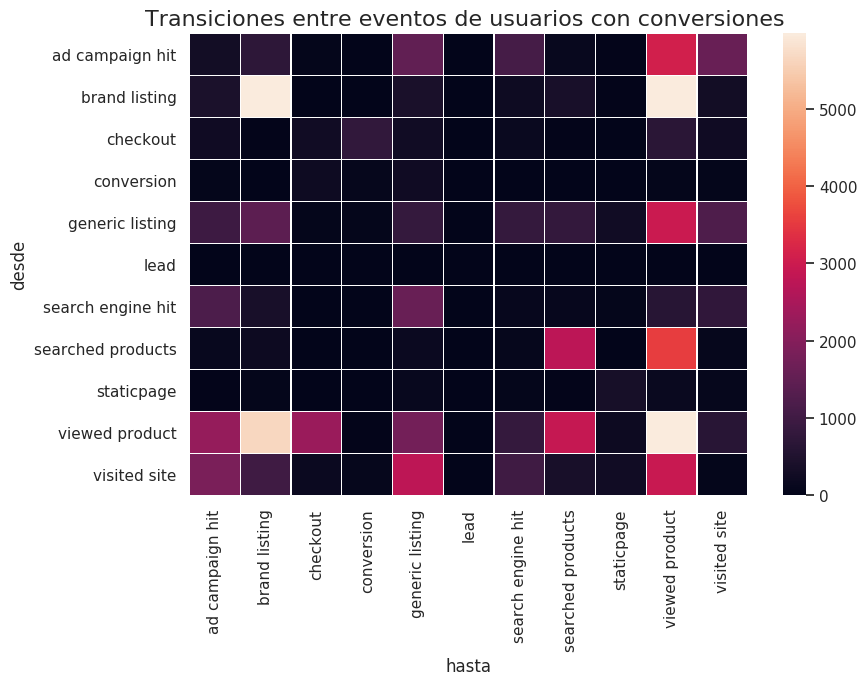

In [135]:
f, ax = plt.subplots(figsize=(9, 6))
g = sns.heatmap(
path_agrupado_de_usuarios_con_conversiones, annot=False, linewidths=.2, ax=ax, robust=True)
g.set_title("Transiciones entre eventos de usuarios con conversiones ", fontsize=16)

Con los usuarios que tienen conversiones, podemos ver que los que llegan a ver un producto vienen desde el listado de marcas, seguido por los resultados de busqueda. Dejando (a diferencia del resto de los usuarios) en tercer lugar a los hits de publicidad, lo que nos hace ver que no siguen el mismo flujo que los usuarios en general.

### ¿Cuales son la urls con mas hits de publicidad?

Text(0.5,1,'Cantidad de ocurrencias de cada evento')

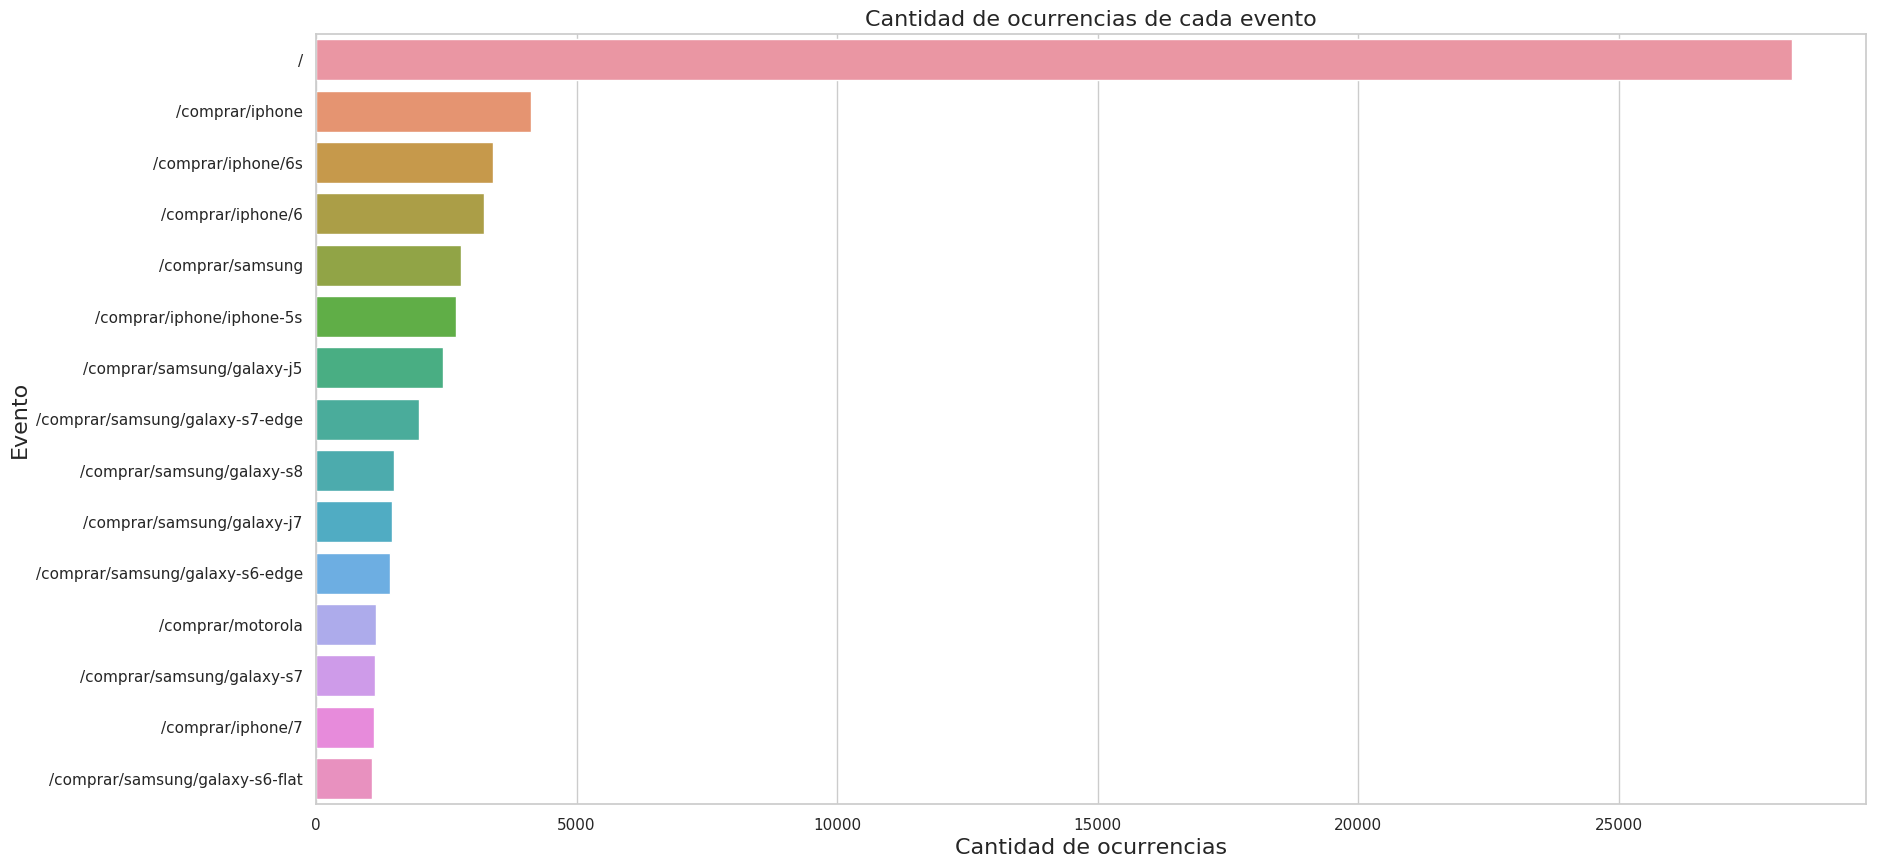

In [160]:
eventos_por_url = events[['event','url']].dropna()
cantidad_de_hits_por_url=eventos_por_url['url'].value_counts().head(15)

g = sns.barplot(x=cantidad_de_hits_por_url.values, y=cantidad_de_hits_por_url.index, orient='h')
g.set_xlabel("Cantidad de ocurrencias", fontsize=16)
g.set_ylabel("Evento", fontsize=16)
g.set_title("Cantidad de ocurrencias de cada evento", fontsize=16)

Vemos que la home es la url con mayor cantidad de hits de publicidad, seguida por urls de productos